In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel(r'c:\Users\Administrateur\Downloads\dcod20.xlsx', index_col = 'Value Date', parse_dates = True)



In [3]:
data.shape

(119, 23)

In [4]:
data.columns

Index(['Instrument', 'Issuer', 'Currency', 'Sign', 'Type', 'Kind',
       'Maturity Date', 'Opening Date', 'Premium Currency', 'Portfolio',
       'Trader', 'Secondary Instrument', 'Counterparty', 'FX Quote Amount',
       'Accounting CSD', 'Status', 'Instrument Group', 'Fixing Rate',
       'Currency 2', 'Top Portfolio', 'Deal Rate', 'Book Value', 'Amount'],
      dtype='object')

In [5]:
data = data.drop(['Secondary Instrument', 'FX Quote Amount','Status', 'Fixing Rate', 'Currency 2', 'Top Portfolio','Counterparty','Deal Rate', 'Book Value'], axis=1)

In [6]:
data.shape

(119, 14)

In [7]:
data.describe()

,Amount
count,1.190000e+02
mean,-2.908714e+07
std,3.594845e+07
min,-1.700000e+08
25%,-3.000000e+07
50%,-1.640000e+07
75%,-9.380000e+06
max,3.643000e+07


In [8]:
data.head()

,Instrument,Issuer,Currency,Sign,Type,Kind,Maturity Date,Opening Date,Premium Currency,Portfolio,Trader,Accounting CSD,Instrument Group,Amount
Value Date,,,,,,,,,,,,,,
2020-11-12,DCOD-FX-OPTION-SOLD,SOGEPARHCM,USD,Sell,Call,Other,2020-11-12,2020-04-30,USD,NET-RES-USD-INV,BBENSALAH,SOGEPARHCM-USD,/FX/OPTN,-4800000
2020-11-18,DCOD-FX-OPTION-SOLD,BISBBSL,USD,Sell,Call,Other,2020-11-18,2020-05-04,USD,NET-RES-USD-INV,BBENSALAH,BISBBSL-USD,/FX/OPTN,-100000000
2020-11-16,DCOD-FX-OPTION-SOLD,BOFMMONFXM,USD,Sell,Call,Other,2020-11-16,2020-05-04,USD,NET-RES-USD-INV,BBENSALAH,BOFMMONFXM-USD,/FX/OPTN,-10000000
2020-11-16,DCOD-FX-OPTION-SOLD,CRLYLON,USD,Sell,Call,Other,2020-11-16,2020-05-04,USD,NET-RES-USD-INV,BBENSALAH,CRLYLON-USD,/FX/OPTN,-11500000
2020-11-06,DCOD-FX-OPTION-SOLD,BISBBSL,USD,Sell,Call,Other,2020-11-06,2020-04-28,USD,NET-RES-USD-INV,BBENSALAH,BISBBSL-USD,/FX/OPTN,-170000000


In [9]:
data.shape

(119, 14)

In [10]:
data['Instrument Group'].value_counts()

/FX/OPTN          112
/IR/DCOD            3
/IR/DEPO/SHORT      2
/FX/SPOT            2
Name: Instrument Group, dtype: int64

<AxesSubplot:>

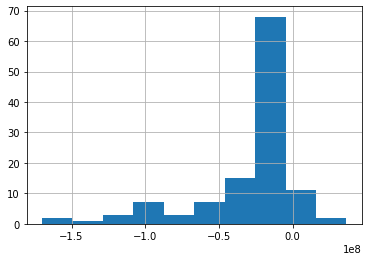

In [11]:
data['Amount'].hist()

In [12]:
data['NewAmount'] = data.apply(lambda row: abs(row.Amount) , axis = 1) 
  

In [13]:
data.head()

,Instrument,Issuer,Currency,Sign,Type,Kind,Maturity Date,Opening Date,Premium Currency,Portfolio,Trader,Accounting CSD,Instrument Group,Amount,NewAmount
Value Date,,,,,,,,,,,,,,,
2020-11-12,DCOD-FX-OPTION-SOLD,SOGEPARHCM,USD,Sell,Call,Other,2020-11-12,2020-04-30,USD,NET-RES-USD-INV,BBENSALAH,SOGEPARHCM-USD,/FX/OPTN,-4800000,4800000
2020-11-18,DCOD-FX-OPTION-SOLD,BISBBSL,USD,Sell,Call,Other,2020-11-18,2020-05-04,USD,NET-RES-USD-INV,BBENSALAH,BISBBSL-USD,/FX/OPTN,-100000000,100000000
2020-11-16,DCOD-FX-OPTION-SOLD,BOFMMONFXM,USD,Sell,Call,Other,2020-11-16,2020-05-04,USD,NET-RES-USD-INV,BBENSALAH,BOFMMONFXM-USD,/FX/OPTN,-10000000,10000000
2020-11-16,DCOD-FX-OPTION-SOLD,CRLYLON,USD,Sell,Call,Other,2020-11-16,2020-05-04,USD,NET-RES-USD-INV,BBENSALAH,CRLYLON-USD,/FX/OPTN,-11500000,11500000
2020-11-06,DCOD-FX-OPTION-SOLD,BISBBSL,USD,Sell,Call,Other,2020-11-06,2020-04-28,USD,NET-RES-USD-INV,BBENSALAH,BISBBSL-USD,/FX/OPTN,-170000000,170000000


In [14]:
data.columns

Index(['Instrument', 'Issuer', 'Currency', 'Sign', 'Type', 'Kind',
       'Maturity Date', 'Opening Date', 'Premium Currency', 'Portfolio',
       'Trader', 'Accounting CSD', 'Instrument Group', 'Amount', 'NewAmount'],
      dtype='object')

In [15]:
data = data[data['Maturity Date']<'2021-12-12']

In [16]:
data.groupby(['Maturity Date', 'Sign','Accounting CSD','Kind', 'Currency', 'Type']).sum().tail()

Amount  NewAmount
Maturity Date Sign Accounting CSD Kind      Currency Type                     
2021-03-01    Buy  BYLAMUN-USD    Roll Over USD      Spot  17710000   17710000
                   SCBLLONTSY-USD Other     USD      Spot   9500000    9500000
              Sell ABNAAMS-USD    Other     USD      Call -12290000   12290000
                   BYLAMUN-USD    Other     USD      Call -17710000   17710000
                   SCBLLONTSY-USD Other     USD      Call  -9500000    9500000

In [17]:
data.drop(['Amount'], axis=1, inplace=True)

<AxesSubplot:>

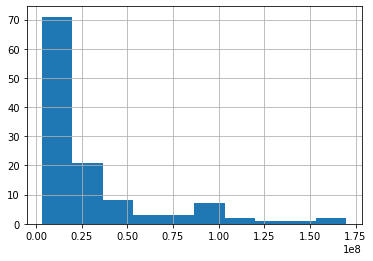

In [18]:
data['NewAmount'].hist()